In [1]:
import numpy as np
from matplotlib.pyplot import figure
from scipy.integrate import odeint
from matplotlib import pyplot as plt
import pandas as pd
from definitions import ROOT_DIR
%cd $ROOT_DIR
SHOW_TITLE = False

/home/x/doc/dev/master/CancerTherapyPrediction


In [2]:
from asymilacja.paramteres.Vis7LinspKlusekShortLinearEachIter import plot_parameters, plot_truth
from data.klusek.EP1.config import threatment_start, threatment_end,threatment2_start
def unit_step_fun(x,threshold):
    return x*(1 / 2 + 1 / 2 *np.tanh(100 * (x-threshold)))

threatment_time = threatment_end - threatment_start
steps_backward = threatment_start
steps_forward = threatment2_start - threatment_start

df = pd.read_csv("data/klusek/EP1/stats0.csv")
df_true = df[(df['iteration'] >= 0) & (df['iteration']<=threatment2_start)]
P_true = list(df_true.prolif_cells)
t_true = list(df_true.iteration)
t_real = list(df_true.t)

In [3]:
def compare_parameters(fullParams, parameters, labels,title ):  # fullParams, [threesixth,fivesixth,sixsixth] , ['1/2','5/6','6/6']
    figure(figsize=(20, 6), dpi=80)

    i=0
    for partialParams, label in zip(parameters,labels):

        proportions = []
        sorted(fullParams.keys(), key=lambda x:x.lower())

        X_axis = np.arange(len(fullParams))

        X = fullParams.keys()

        for (k,v) in fullParams.items():
            proportion = partialParams[k]/fullParams[k]*100
            # print(f"{k} {proportion:.2f}% ")
            proportions.append(proportion)
        plt.bar(X_axis +i, proportions, 0.25, label=label)
        i+=0.25


    plt.xticks(X_axis, X)
    plt.xlabel("Groups")
    plt.ylabel("(nowa wartość) / (wartość w modelu pełnym) [%]")
    if SHOW_TITLE:
        plt.title(title)
    plt.legend()
    plt.show()


# EP1/Training12_GS3
    dCdt =-KDE * C
    dPdt = lambda_p * P*(1-P/K) - 1/T_death*P - gamma_p * unit_step_fun(C,eta)  * P


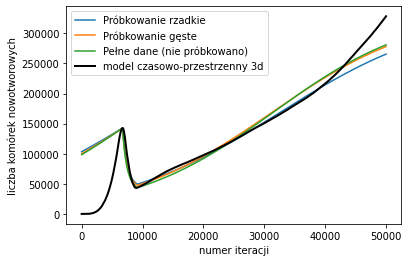

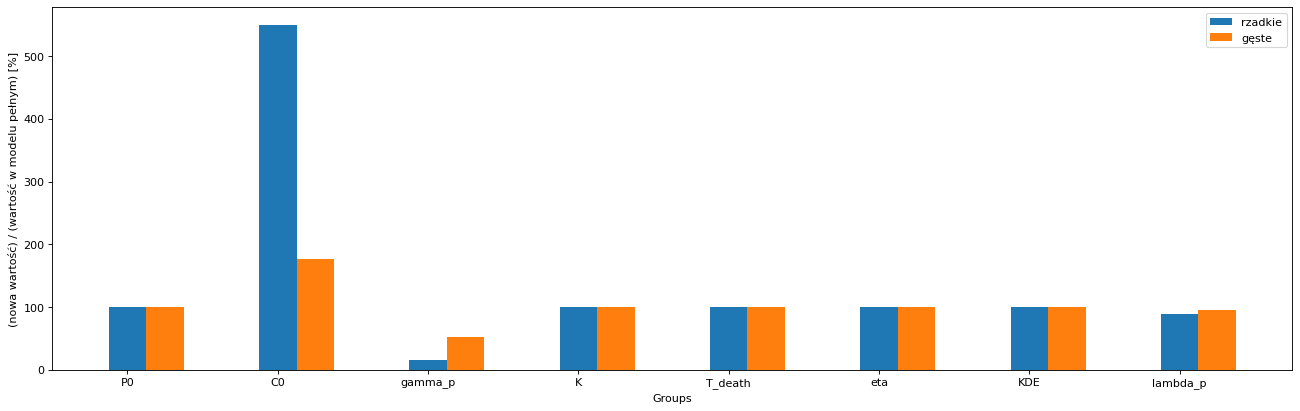

In [4]:
def differentialForward(y, t, paras):
    [P, C] = y
    lambda_p = paras['lambda_p']
    gamma_p = paras['gamma_p']
    KDE = paras['KDE']
    K = paras['K']
    eta = paras['eta']*paras['C0']
    T_death = paras['T_death']
    dCdt =-KDE * C
    dPdt = lambda_p * P*(1-P/K) - 1/T_death*P - gamma_p * unit_step_fun(C,eta)  * P
    return [dPdt, dCdt]



USE_REAL_TIME = False

rzadki ={'P0': 142730, 'C0': 1.4294662713581499, 'gamma_p': 0.0006994770743930517, 'K': 349984.8271263112, 'T_death': 350477.8141338214, 'eta': 0.19999999999999998, 'KDE': 0.0006645078086020233, 'lambda_p': 7.808391881674467e-05}
gesty ={'P0': 142730, 'C0': 0.459440542893518, 'gamma_p': 0.0022795266108102106, 'K': 350143.0759008658, 'T_death': 352131.9363377389, 'eta': 0.19998475189978773, 'KDE': 0.0006645392881261836, 'lambda_p': 8.474517120826804e-05}
pelneDane ={'P0': 142730, 'C0': 0.25987146799548205, 'gamma_p': 0.004321835524976496, 'K': 350251.14811034605, 'T_death': 352439.8998750388, 'eta': 0.1999991646415665, 'KDE': 0.0006645095331275767, 'lambda_p': 8.830713934549235e-05}

plot_parameters(differentialForward,rzadki,steps_forward,steps_backward,threatment_start,"Próbkowanie rzadkie",USE_REAL_TIME,t_real,differentialBackward=differentialForward)

plot_parameters(differentialForward,gesty,steps_forward,steps_backward,threatment_start,"Próbkowanie gęste",USE_REAL_TIME,t_real,differentialBackward=differentialForward)

plot_parameters(differentialForward,pelneDane,steps_forward,steps_backward,threatment_start,"Pełne dane (nie próbkowano)",USE_REAL_TIME,t_real,differentialBackward=differentialForward)

plot_truth(t_true,P_true, USE_REAL_TIME,t_real)
if SHOW_TITLE:
    plt.title("Wpływ gęstości próbkowania przed fazą asymilacji na parametry modelu")
plt.legend()
plt.show()

compare_parameters(pelneDane, [rzadki, gesty], ['rzadkie', 'gęste'],
                   "Porównanie parametrów otrzymanych w uczeniu z próbkowaniem rzadkim i gęstym z parametrami uzyskanymi jeśli nie stosowano próbkowania")


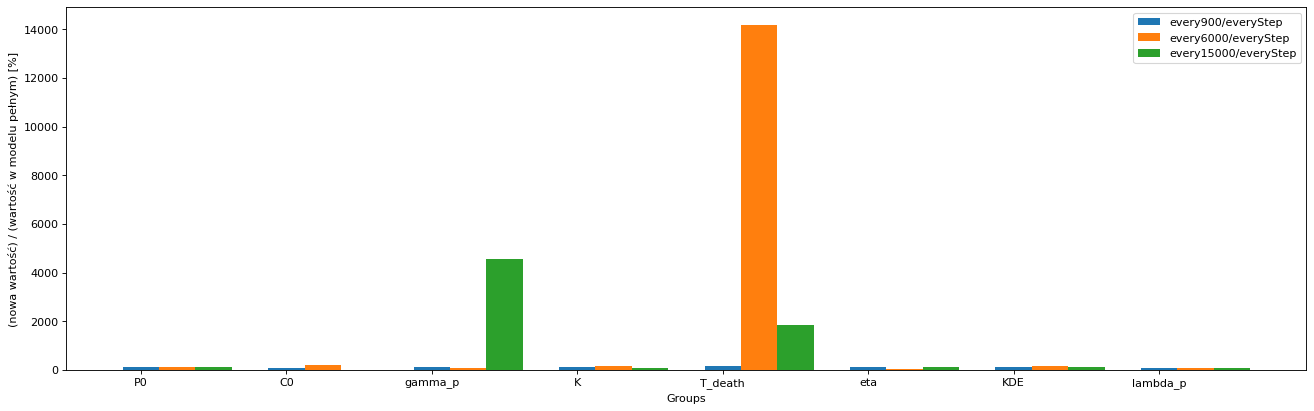

In [5]:
##### porównanie co n-ta iteracja, okres_uczenia pełny
every5 ={'P0': 142730, 'C0': 0.2346080628128567, 'gamma_p': 0.004779236788702153, 'K': 351118.3808411085, 'T_death': 361534.3906085735, 'eta': 0.1999946545660608, 'KDE': 0.0006645188439145225, 'lambda_p': 8.797744523288126e-05}

every10 ={'P0': 142730, 'C0': 0.23517977923662195, 'gamma_p': 0.004774153470287481, 'K': 350416.49205350195, 'T_death': 354185.7144746991, 'eta': 0.1999878533664603, 'KDE': 0.0006645328849901455, 'lambda_p': 8.824639898838643e-05}

every20={'P0': 142730, 'C0': 0.19278148377985496, 'gamma_p': 0.005833963438338209, 'K': 350255.7803574072, 'T_death': 352489.00443922955, 'eta': 0.19925905726496984, 'KDE': 0.0006660402582812294, 'lambda_p': 8.833259197901265e-05}

every300 ={'P0': 142730, 'C0': 0.27962774455630424, 'gamma_p': 0.0034922074583229696, 'K': 488928.919220689, 'T_death': 2488750.97299325, 'eta': 0.19839995927437284, 'KDE': 0.0006678242317926027, 'lambda_p': 6.586875162157299e-05}

every900 ={'P0': 142730, 'C0': 0.24887562846622993, 'gamma_p': 0.004321539702495615, 'K': 389340.4284344299, 'T_death': 616288.1198385097, 'eta': 0.19943482580882668, 'KDE': 0.0006656762112722198, 'lambda_p': 7.94443352619414e-05}


every2000={'P0': 142730, 'C0': 0.10041033471292628, 'gamma_p': 0.01489936188286454, 'K': 350929.36778627604, 'T_death': 360300.8694216891, 'eta': 0.09097900882851677, 'KDE': 0.0009897301698135077, 'lambda_p': 8.817233920315838e-05}

every4000={'P0': 142730, 'C0': 0.3221306302766143, 'gamma_p': 0.0042717231814362435, 'K': 350225.2766548408, 'T_death': 352686.18306400266, 'eta': 0.10455159698731968, 'KDE': 0.0009323181578684536, 'lambda_p': 8.603085565889748e-05}

every6000={'P0': 142730, 'C0': 0.4791346190763601, 'gamma_p': 0.0026260999614754737, 'K': 499999.99833057733, 'T_death': 49998786.011322506, 'eta': 0.09840226279799044, 'KDE': 0.0009573457800469836, 'lambda_p': 6.547100553227842e-05}

every10000={'P0': 142730, 'C0': 0.007952956986484978, 'gamma_p': 0.18090854434752301, 'K': 499986.30984179635, 'T_death': 47686517.912777245, 'eta': 0.14891237320668127, 'KDE': 0.0007862911830383609, 'lambda_p': 6.439345144008068e-05}

every15000={'P0': 142730, 'C0': 0.006550517314184325, 'gamma_p': 0.19636880479991034, 'K': 321450.32105151267, 'T_death': 6554991.763409221, 'eta': 0.19794200947483803, 'KDE': 0.0006687783536853671, 'lambda_p': 7.420387201819654e-05}

everyIter ={'P0': 142730, 'C0': 0.25987146799548205, 'gamma_p': 0.004321835524976496, 'K': 350251.14811034605, 'T_death': 352439.8998750388, 'eta': 0.1999991646415665, 'KDE': 0.0006645095331275767, 'lambda_p': 8.830713934549235e-05}

compare_parameters(everyIter, [every900,every6000,every15000] , ['every900/everyStep','every6000/everyStep','every15000/everyStep'],"okres_uczenia=maksymalny Jak zmienią się parametry jeśli próbkujemy" )


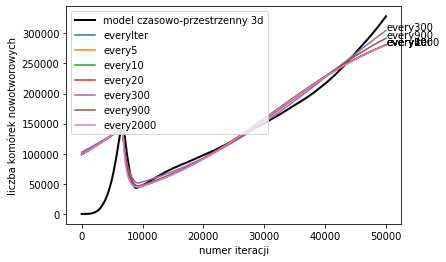

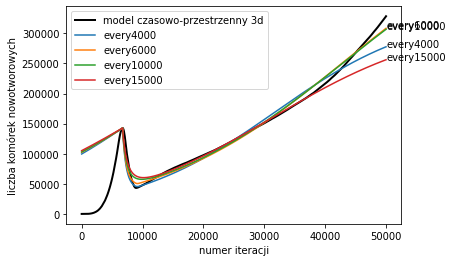

In [6]:

plot_truth(t_true, P_true, USE_REAL_TIME, t_real)
plot_parameters(differentialForward, everyIter, steps_forward, steps_backward, threatment_start, "everyIter",
                USE_REAL_TIME, t_real,lineLabel="everyIter")

steps = [5,10,20,300,900,2000]
for i in steps:
    name = f"every{i}"
    parameters = globals()[name]

    plot_parameters(differentialForward, parameters, steps_forward, steps_backward, threatment_start, name,
                    USE_REAL_TIME, t_real,lineLabel=name)


if SHOW_TITLE:
    plt.title("Porównanie modeli w zależności od gęstości próbkowania")
plt.legend()
plt.show()

plot_truth(t_true, P_true, USE_REAL_TIME, t_real)


steps = [4000,6000,10000,15000]
for i in steps:
    name = f"every{i}"
    parameters = globals()[name]

    plot_parameters(differentialForward, parameters, steps_forward, steps_backward, threatment_start, name,
                    USE_REAL_TIME, t_real,lineLabel=name)


if SHOW_TITLE:
    plt.title("Porównanie modeli w zależności od gęstości próbkowania")
plt.legend()
plt.show()


##### porównanie co tysięczna iteracja vs oryginał uczenie 6/6Threatment

# EP1/Training13LinspKlusekShortEachIterLinear.py

    dCdt =-KDE * C
    dPdt = lambda_p * P*(1-P/K)  - alpha*t - gamma_p * unit_step_fun(C,eta)  * P

# EP1/Training15LinspKlusekShortEachIterLinear.py
    dCdt =-KDE * C
    dPdt = lambda_p * P*(1-P/K)  - gamma_p * unit_step_fun(C,eta)  * P